In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the finalized data
df = pd.read_csv('../finalized_data/cleaned_data.csv')

In [10]:
df.head(2)

,Unnamed: 0,title,company,location,description
0,15,Lead Financial Analyst,Ascension,"Jacksonville, FL, USA",Perform analysis and reporting regarding ...
1,16,Financial Analyst Level I,Adecco,"Jacksonville, FL, USA",Adecco is currently assisting a local fin...


In [12]:
print("First few rows of the DataFrame:")
print(df.head())

# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

First few rows of the DataFrame:
   Unnamed: 0                                  title  \
0          15                 Lead Financial Analyst   
1          16             Financial Analyst  Level I   
2          17            Financial Analyst (Level I)   
3          18          FP&A Analyst - Virtual/Remote   
4          19  Supervisory Financial Systems Analyst   

                                             company               location  \
0                                          Ascension  Jacksonville, FL, USA   
1                                             Adecco  Jacksonville, FL, USA   
2  NATA-Certified | Columbus OH FBO | Rickenbacke...  Jacksonville, FL, USA   
3                                          Enumerate  Jacksonville, FL, USA   
4                           Internal Revenue Service  Jacksonville, FL, USA   

                                         description  
0  Perform   analysis   and reporting regarding  ...  
1    Adecco    is currently assisting a local

In [14]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0      0
title           0
company         0
location       12
description     0
dtype: int64


In [17]:
# Get the unique values in the title column with their counts

print("\nUnique values in the 'title' column:")
print(df['title'].value_counts())


Unique values in the 'title' column:
Financial Analyst                                                   233
Business Analyst                                                    120
Data Analyst                                                         94
Senior Financial Analyst                                             76
FP&A Analyst - Virtual/Remote                                        46
                                                                   ... 
Senior Financial Analyst - Ag Retail                                  1
Senior Financial Analyst, R&D                                         1
Business Finance Senior Analyst                                       1
Information Security Analyst III (Security Maturity Assessments)      1
Maryland Longitudinal Data System Data Quality Analyst                1
Name: title, Length: 2155, dtype: int64


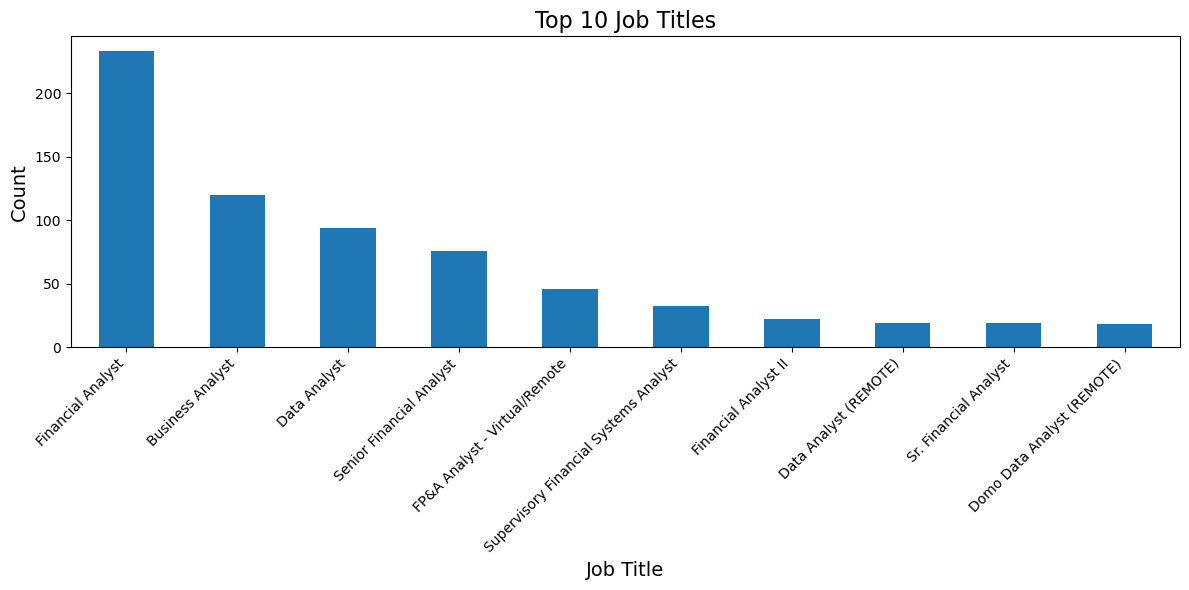

In [24]:
title_counts = df['title'].value_counts()

top_10_titles = title_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_titles.plot(kind='bar')

# Add title and labels
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
annotated_data

0    [ContentBlock(text="{\n    'hard_skills': ['co...
Name: description, dtype: object

In [52]:
import pandas as pd

df = pd.read_csv('../data/job_data_cleaned.csv')
df.head()

,title,company,location,description
0,Project Lead,Softmax,"Washington, DC, US",benefits competitive salary 100 onsite role lo...
1,Operations Analyst,"MELE Associates, Inc","Washington, DC, US",this position is for an operations analyst to ...
2,Senior Pricing and Business Analyst,"Roland Foods, LLC.","Gaithersburg, MD, US",about albert uster imports albert uster import...
3,Operations Research Analyst,Amentum,"Fort Belvoir, VA, US",amentum is currently seeking talented enthusia...
4,Jr. Business Analyst,BRS,"Washington, DC, US",tss is seeking onsite administrative and techn...


In [53]:
# looking for if the data is not repeated

df.duplicated().sum()

0

In [54]:
# finding the missing values

df.isnull().sum()

title            0
company        123
location         0
description      0
dtype: int64

In [56]:
# cheking for the unique values in the title column

df['title'].value_counts()

title
Business Analyst                                                          241
Data Scientist                                                            231
Data Analyst                                                              161
Software Engineer                                                         102
Data Engineer                                                              86
                                                                         ... 
Director, Analytics & Strategic Operations                                  1
Rent Payable Business Analyst                                               1
Copy of Commercial Lines Account Manager                                    1
Business Analyst - (Consumer Experience - Quantitative Research)            1
Open Rank Professor in Atmospheric Science with Data Science Expertise      1
Name: count, Length: 14173, dtype: int64

In [63]:
df = pd.read_csv('../data/job_data_scraped.csv')

# cleaning the data

from cleaner import JobDataCleaner

cleaner = JobDataCleaner(df)
cleaner.remove_null_descriptions()
cleaner.clean_descriptions()
cleaner.remove_duplicates()
clean_data = cleaner.get_cleaned_data()

In [64]:
clean_data.shape

(18857, 4)

In [65]:
# saving the cleaned data

clean_data.to_csv('../data/job_data_cleaned.csv', index=False)

In [67]:
clean_data.shape

(18857, 4)

In [68]:
clean_data1 = clean_data.head(100)
clean_data1.to_csv('../data/job_data_cleaned1.csv', index=False)

In [ ]:
# creating a file with 10000 rows which does not include data from the cleaned data1

clean_data2 = clean_data[100:10100]
clean_data2.to_csv('../data/job_data_cleaned2.csv', index=False)